In [4]:
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px

In [5]:
data = pd.read_csv('BankChurners.csv')

In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [8]:
data2 = data[['Credit_Limit', 'Total_Trans_Ct', 'Total_Relationship_Count']]
data2

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
0,12691.0,42,5
1,8256.0,33,6
2,3418.0,20,4
3,3313.0,20,3
4,4716.0,28,5
...,...,...,...
10122,4003.0,117,3
10123,4277.0,69,4
10124,5409.0,60,5
10125,5281.0,62,4


In [9]:
data2.describe()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
count,10127.000000,10127.000000,10127.000000
mean,8631.953698,64.858695,3.812580
std,9088.776650,23.472570,1.554408
min,1438.300000,10.000000,1.000000
25%,2555.000000,45.000000,3.000000
50%,4549.000000,67.000000,4.000000
75%,11067.500000,81.000000,5.000000
max,34516.000000,139.000000,6.000000


<Axes: >

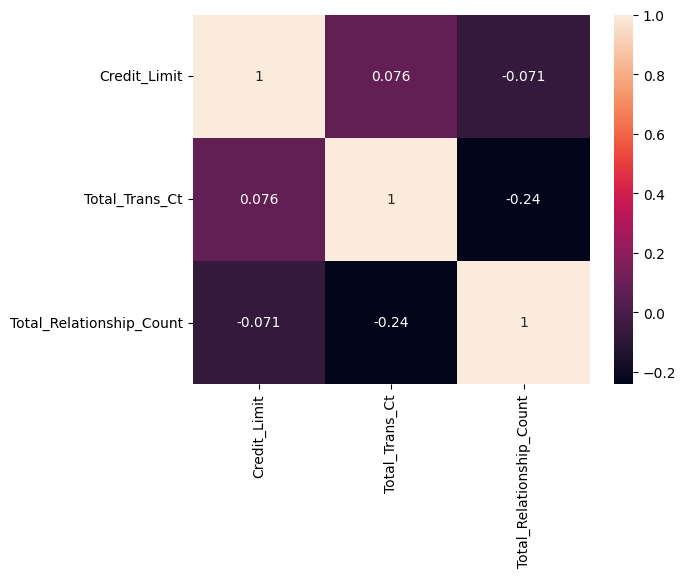

In [10]:
sns.heatmap( data2[['Credit_Limit', 'Total_Trans_Ct', 'Total_Relationship_Count']].corr(),annot=True)

<Axes: xlabel='Credit_Limit', ylabel='Count'>

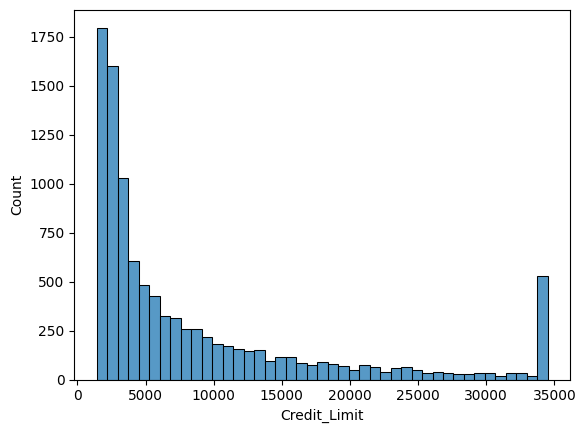

In [11]:
sns.histplot(data=data2, x='Credit_Limit')

<Axes: xlabel='Total_Relationship_Count', ylabel='Count'>

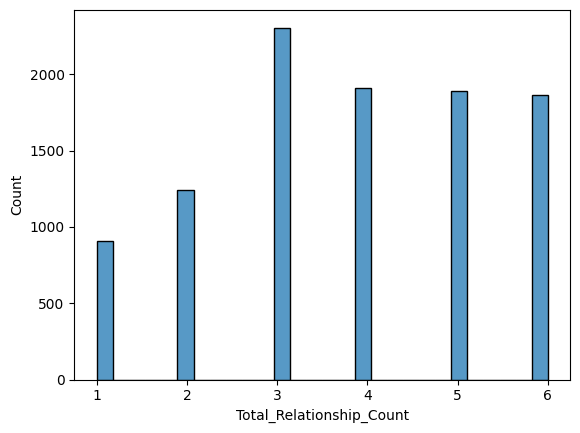

In [12]:
sns.histplot(data=data2, x='Total_Relationship_Count')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

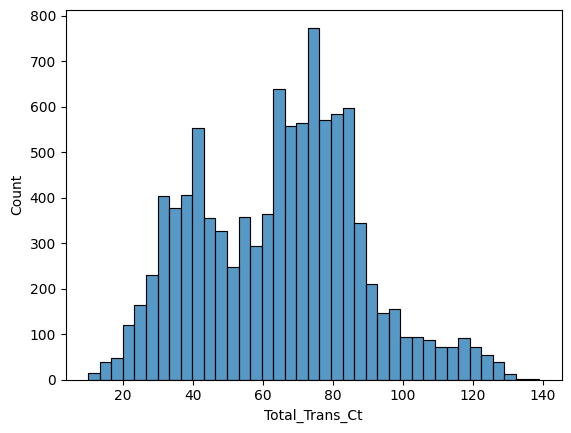

In [13]:
sns.histplot(data=data2, x='Total_Trans_Ct')

## Summar 0.001 a los datos iguales a 0

In [14]:
#data2 = data2.applymap(lambda x: x + 0.001 if x == 0 else x)
#print(data2)

In [15]:
temp = pd.DataFrame()

for col in data2.columns:
    column = data2[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data2[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =2555.0 Q3=11067.5 IQR =8512.5 umbral_inferior = -10213.75 umbral_superior =23836.25
Q1 =45.0 Q3=81.0 IQR =36.0 umbral_inferior = -9.0 umbral_superior =135.0
Q1 =3.0 Q3=5.0 IQR =2.0 umbral_inferior = 0.0 umbral_superior =8.0


C:\Users\Jose L\AppData\Local\Temp\ipykernel_3088\1667276891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\Jose L\AppData\Local\Temp\ipykernel_3088\1667276891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\Jose L\AppData\Local\Temp\ipykernel_3088\1667276891.py:14: SettingWithCopyWarning: 
A value is trying to be s

In [16]:
data2

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,Credit_Limit_outliers,Total_Trans_Ct_outliers,Total_Relationship_Count_outliers
0,12691.0,42,5,False,False,False
1,8256.0,33,6,False,False,False
2,3418.0,20,4,False,False,False
3,3313.0,20,3,False,False,False
4,4716.0,28,5,False,False,False
...,...,...,...,...,...,...
10122,4003.0,117,3,False,False,False
10123,4277.0,69,4,False,False,False
10124,5409.0,60,5,False,False,False
10125,5281.0,62,4,False,False,False


In [17]:
data2.groupby(by='Credit_Limit_outliers').count()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,Total_Trans_Ct_outliers,Total_Relationship_Count_outliers
Credit_Limit_outliers,,,,,
False,9143,9143,9143,9143,9143
True,984,984,984,984,984


In [18]:
data2.groupby(by='Total_Trans_Ct_outliers').count()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,Credit_Limit_outliers,Total_Relationship_Count_outliers
Total_Trans_Ct_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [19]:
data2.groupby(by='Total_Relationship_Count_outliers').count()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,Credit_Limit_outliers,Total_Trans_Ct_outliers
Total_Relationship_Count_outliers,,,,,
False,10127,10127,10127,10127,10127


In [20]:
data_sin_outliers = data2[(data2['Credit_Limit_outliers'] == False) & 
                         (data2['Total_Trans_Ct_outliers'] == False) &
                         (data2['Total_Relationship_Count_outliers'] == False)]
data_sin_outliers.reset_index(drop=True, inplace=True)


In [21]:
data_sin_outliers

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,Credit_Limit_outliers,Total_Trans_Ct_outliers,Total_Relationship_Count_outliers
0,12691.0,42,5,False,False,False
1,8256.0,33,6,False,False,False
2,3418.0,20,4,False,False,False
3,3313.0,20,3,False,False,False
4,4716.0,28,5,False,False,False
...,...,...,...,...,...,...
9137,4003.0,117,3,False,False,False
9138,4277.0,69,4,False,False,False
9139,5409.0,60,5,False,False,False
9140,5281.0,62,4,False,False,False


In [22]:
data_sin_outliers.describe()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
count,9142.000000,9142.000000,9142.000000
mean,6164.048906,64.385583,3.847517
std,5228.472727,22.999203,1.540094
min,1438.300000,10.000000,1.000000
25%,2444.250000,45.000000,3.000000
50%,3907.000000,67.000000,4.000000
75%,8376.000000,80.000000,5.000000
max,23760.000000,131.000000,6.000000


In [23]:
data_sin_outliers = data_sin_outliers[['Credit_Limit', 'Total_Trans_Ct', 'Total_Relationship_Count']]
data_sin_outliers

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
0,12691.0,42,5
1,8256.0,33,6
2,3418.0,20,4
3,3313.0,20,3
4,4716.0,28,5
...,...,...,...
9137,4003.0,117,3
9138,4277.0,69,4
9139,5409.0,60,5
9140,5281.0,62,4


In [24]:
#data_sin_outliers = data_sin_outliers.applymap(lambda x: x + 0.001 if x == 0 else x)
#print(data_sin_outliers)

In [25]:
from scipy import stats

lambdas = []
nombre = []
dataframe = pd.DataFrame()

for x in data_sin_outliers.columns:
    df, lamb = stats.boxcox(data_sin_outliers[x])
    lambdas.append(lamb)
    nombre.append(x)
    dataframe[x] = df

In [26]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Credit_Limit,-0.278823
1,Total_Trans_Ct,0.781811
2,Total_Relationship_Count,1.003287


In [27]:
dataframe.describe()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
count,9142.000000,9142.000000,9142.000000
mean,3.235360,31.528528,2.856329
std,0.072647,9.380824,1.546384
min,3.114237,6.460351,0.000000
25%,3.179147,23.804972,2.004264
50%,3.229084,32.961673,3.008379
75%,3.297547,38.053697,4.013328
max,3.370442,56.557669,5.018942


<Axes: xlabel='Credit_Limit', ylabel='Count'>

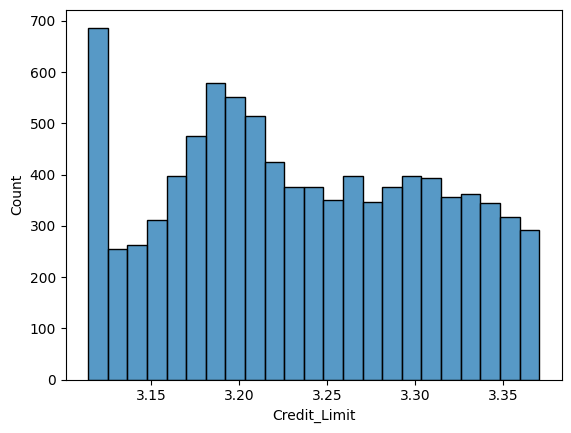

In [28]:
sns.histplot(dataframe,x= 'Credit_Limit')

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

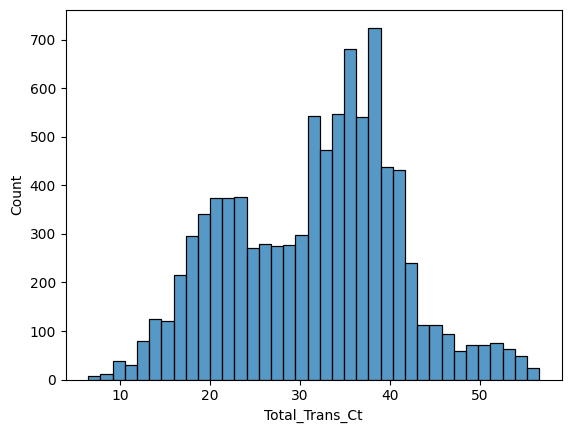

In [29]:
sns.histplot(dataframe,x= 'Total_Trans_Ct')

<Axes: xlabel='Total_Relationship_Count', ylabel='Count'>

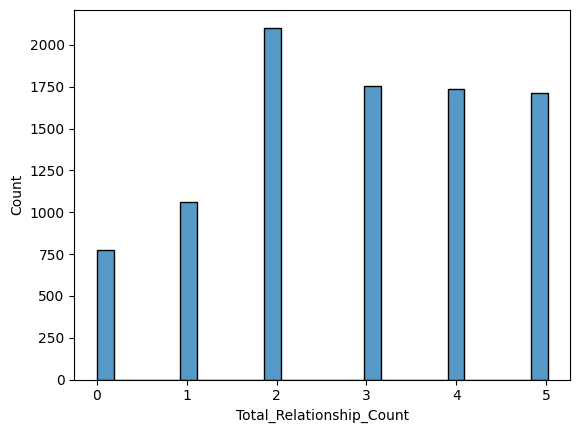

In [30]:
sns.histplot(dataframe,x= 'Total_Relationship_Count')

In [31]:
inercia = []
ks = []

for k in range(1,60):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(dataframe)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\Jose L\anaconda3\envs\Clasemiercoles\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jose L\anaconda3\envs\Clasemiercoles\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jose L\anaconda3\envs\Clasemiercoles\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jose L\anaconda3\envs\Clasemiercoles\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

In [32]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

<Axes: xlabel='k', ylabel='inercia'>

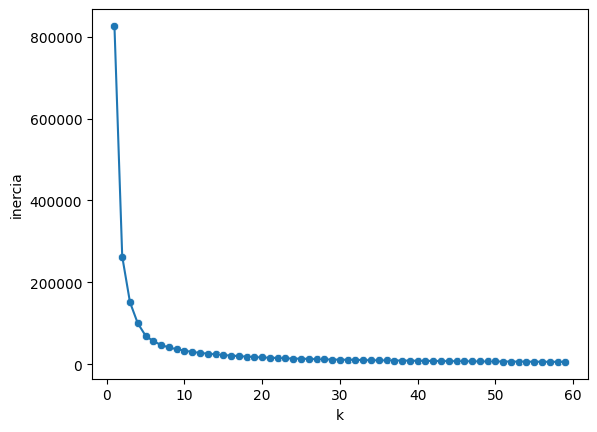

In [33]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [34]:
modelo = KMeans(n_clusters=4,random_state = 10)
modelo.fit(dataframe)

c:\Users\Jose L\anaconda3\envs\Clasemiercoles\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=10)

In [35]:
dataframe['cluster'] = modelo.labels_
dataframe

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count,cluster
0,3.329158,22.487797,4.013328,1
1,3.296382,18.403811,5.018942,1
2,3.215507,12.027228,3.008379,1
3,3.212265,12.027228,2.004264,1
4,3.247355,16.031119,4.013328,1
...,...,...,...,...
9137,3.231495,51.666334,2.004264,2
9138,3.237988,33.758200,3.008379,0
9139,3.260075,30.131514,4.013328,0
9140,3.257888,30.947148,3.008379,0


In [36]:
dataframe.groupby(by='cluster').count()

,Credit_Limit,Total_Trans_Ct,Total_Relationship_Count
cluster,,,
0,2586,2586,2586
1,2660,2660,2660
2,695,695,695
3,3201,3201,3201


In [37]:
dataframe.groupby(by='cluster').agg(['min','mean','max'])

Credit_Limit                     Total_Trans_Ct                        \
                 min      mean       max            min       mean        max   
cluster                                                                         
0           3.114237  3.240169  3.370397      25.531848  30.754437  34.549704   
1           3.114237  3.233661  3.370290       6.460351  19.707037  25.103111   
2           3.114237  3.281351  3.370442      43.339010  48.795419  56.557669   
3           3.114237  3.222901  3.370369      34.549704  38.228458  43.709676   

        Total_Relationship_Count                      
                             min      mean       max  
cluster                                               
0                            0.0  3.252042  5.018942  
1                            0.0  3.044402  5.018942  
2                            0.0  1.287909  5.018942  
3                            0.0  2.720892  5.018942

## Características de clústeres 
### Descripciones 

* Clúster 2: Mayor límite de crédito, Mayor cantidad de transacciones, Menor cantidad de productos que usa del banco.
* Clúster 3: Menor límite de crédito, Alto-Intermedio cantidad de transacciones, Bajo-Intermedio cantidad de productos que usa del banco. 
* Clúster 1: Bajo-Intermedio límite de crédito, Menor cantidad de transacciones, Alto-Intermedio cantidad de productos que usa del banco. / Ofrecer seguros de vida, seguros de vehículo. 
* Clúster 0: Alto-Intermedio límite de crédito, Bajo-Intermedio cantidad de transacciones, Mayor cantidad de productos que usa del banco. / Utiliza muchos productos del banco pero posee una cantidad baja de transacciones. Crear una estrategia de marketing para impulsar cuentas de ahorro a largo plazo con este segmento. 


<Axes: xlabel='Credit_Limit', ylabel='Total_Trans_Ct'>

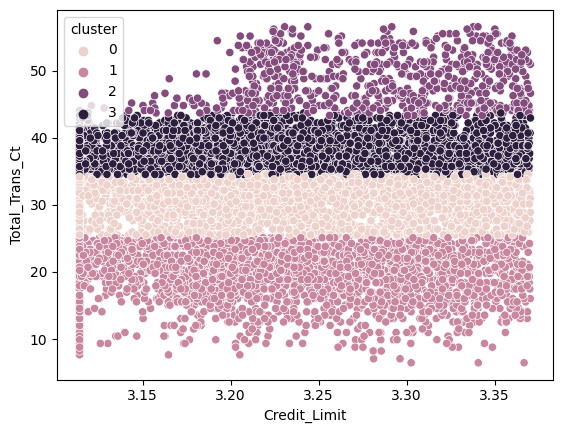

In [38]:
sns.scatterplot(data=dataframe,x='Credit_Limit', y='Total_Trans_Ct', hue='cluster')

<Axes: xlabel='Credit_Limit', ylabel='Total_Relationship_Count'>

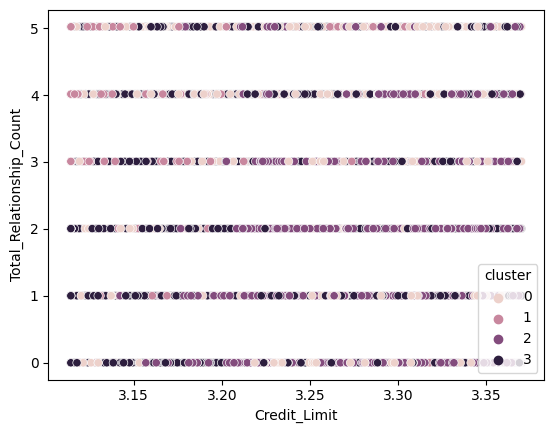

In [39]:
sns.scatterplot(data=dataframe,x='Credit_Limit', y='Total_Relationship_Count', hue='cluster')

In [40]:
fig = px.scatter_3d(dataframe, x = 'Credit_Limit',
y = 'Total_Trans_Ct',
z = 'Total_Relationship_Count',
color = 'cluster')

fig.show()